In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving healthcare_dataset.csv to healthcare_dataset.csv
User uploaded file "healthcare_dataset.csv" with length 8399221 bytes


In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('healthcare_dataset.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('healthcare_dataset.csv')
display(df.head())

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


Clening the dataset step by step

In [ ]:
#checking null values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(534)

In [ ]:
# Helper to fix text fields
def clean_text(x):
    return str(x).strip().title() if pd.notnull(x) else x

for col in ["Name", "Gender", "Doctor", "Hospital",
            "Insurance Provider", "Medical Condition",
            "Medication"]:
    df[col] = df[col].apply(clean_text)


In [ ]:
#Fix dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')


In [ ]:
import numpy as np

#Clean numeric fields
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')
df.loc[df['Billing Amount'] < 0, 'Billing Amount'] = np.nan

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.loc[(df['Age'] < 0) | (df['Age'] > 110), 'Age'] = np.nan

In [ ]:
#Add unique ID
df.insert(0, "Patient_ID", range(1, len(df) + 1))


In [ ]:
#Handle missing simple way
df['Gender'].fillna('Unknown', inplace=True)
df['Admission Type'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3432893144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3432893144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Basic consistency checks
df = df[df['Discharge Date'] >= df['Date of Admission']]  # drop invalid rows



In [ ]:
 #Derived features
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Cost per Day'] = df['Billing Amount'] / df['Length of Stay']
df['Age Group'] = pd.cut(df['Age'], bins=[0,18,45,65,110],
                         labels=['Child','Adult','Middle-Age','Senior'])

In [ ]:
#Outlier flag for billing
q1, q3 = df['Billing Amount'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
df['Billing Outlier'] = df['Billing Amount'].apply(lambda x: 'Yes' if x<lower or x>upper else 'No')

In [ ]:
df.to_csv("healthcare_dataset_cleaned.csv", index=False)
print("Cleaned dataset saved as healthcare_dataset_cleaned.csv")
print(df.info())
print(df.head())

Cleaned dataset saved as healthcare_dataset_cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          55500 non-null  int64         
 1   Name                55500 non-null  object        
 2   Age                 55500 non-null  float64       
 3   Gender              55500 non-null  object        
 4   Blood Type          55500 non-null  object        
 5   Medical Condition   55500 non-null  object        
 6   Date of Admission   55500 non-null  datetime64[ns]
 7   Doctor              55500 non-null  object        
 8   Hospital            55500 non-null  object        
 9   Insurance Provider  55500 non-null  object        
 10  Billing Amount      55392 non-null  float64       
 11  Room Number         55500 non-null  int64         
 12  Admission Type      55500 non-null  object    

In [ ]:
import pandas as pd

df = pd.read_csv("healthcare_dataset.csv", sep=",", engine="python")

In [ ]:
print(df.shape)
print(df.head(10))
print(df.info())

(55500, 15)
                 Name  Age  Gender Blood Type Medical Condition  \
0       Bobby JacksOn   30    Male         B-            Cancer   
1        LesLie TErRy   62    Male         A+           Obesity   
2         DaNnY sMitH   76  Female         A-           Obesity   
3        andrEw waTtS   28  Female         O+          Diabetes   
4       adrIENNE bEll   43  Female        AB+            Cancer   
5       EMILY JOHNSOn   36    Male         A+            Asthma   
6      edwArD EDWaRDs   21  Female        AB-          Diabetes   
7  CHrisTInA MARtinez   20  Female         A+            Cancer   
8     JASmINe aGuIlaR   82    Male        AB+            Asthma   
9    ChRISTopher BerG   58  Female        AB-            Cancer   

  Date of Admission            Doctor                     Hospital  \
0        2024-01-31     Matthew Smith              Sons and Miller   
1        2019-08-20   Samantha Davies                      Kim Inc   
2        2022-09-22  Tiffany Mitchell   

 Exploratory Data Analysis (EDA)

A. Understanding distributions

Age distribution → Which age groups dominate?

Billing Amount distribution → Are there cost spikes or anomalies?

Length of Stay → Typical vs extreme cases.

In [ ]:
# Which age groups dominate?
print("Maximum Age:", df['Age'].max())

Maximum Age: 89.0


In [ ]:
# Frequency of each age group
age_group_frequency = df['Age'].value_counts()
display(age_group_frequency)

,count
Age,
38.0,897
37.0,893
57.0,887
34.0,864
80.0,864
...,...
88.0,25
16.0,24
14.0,18


In [ ]:
# Billing Amount distribution → Are there cost spikes or anomalies?
df['Billing Amount'].describe()

,Billing Amount
count,55392.000000
mean,25590.084632
std,14178.657522
min,9.238787
25%,13297.478682
50%,25573.823359
75%,37849.210062
max,52764.276736


In [ ]:
# Remove outliers from 'Billing Amount'
# Assuming 'Billing Outlier' column has been created in a previous step
df_cleaned = df[df['Billing Outlier'] == 'No'].copy()

# Round 'Billing Amount' to two decimal places
df_cleaned['Billing Amount'] = df_cleaned['Billing Amount'].round(2)

display(df_cleaned.head())

,Patient_ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Cost per Day,Age Group,Billing Outlier
0,1,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2,9428.140653,Adult,No
1,2,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,5607.221214,Middle-Age,No
2,3,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15,1863.673072,Senior,No
3,4,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,1263.659414,Adult,No
4,5,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20,711.915891,Adult,No


<Axes: >

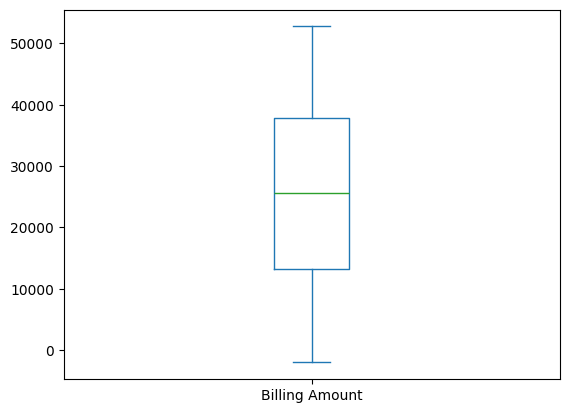

In [ ]:
# Rounding the billing amount to two decimal places
df_cleaned['Billing Amount'] = df_cleaned['Billing Amount'].round(2)
df['Billing Amount'].plot(kind='box')

In [ ]:
df_cleaned = pd.read_csv('healthcare_dataset_cleaned.csv')
display(df_cleaned.head())

,Patient_ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Cost per Day,Age Group,Billing Outlier
0,1,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,9428.140653,Adult,No
1,2,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,5607.221214,Middle-Age,No
2,3,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,1863.673072,Senior,No
3,4,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,1263.659414,Adult,No
4,5,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,711.915891,Adult,No


,Length of Stay
count,55500.000000
mean,15.509009
std,8.659600
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,30.000000


<Axes: ylabel='Frequency'>

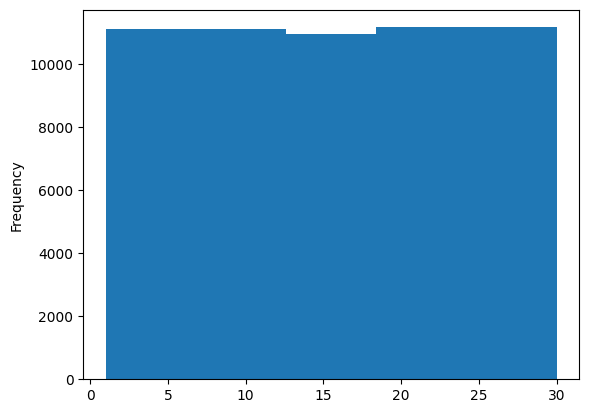

In [ ]:
# Descriptive statistics for Length of Stay
display(df_cleaned['Length of Stay'].describe())
df_cleaned['Length of Stay'].plot(kind='hist', bins=5)

B. Segment by category

1) Average billing per Admission Type (Emergency vs Elective).

2) Average stay by Medical Condition.

3) Costs by Hospital or Doctor.

In [ ]:
# Average billing per Admission Type (Emergency vs Elective).
average_billing_by_admission_type = df_cleaned.groupby('Admission Type')['Billing Amount'].mean()
display(average_billing_by_admission_type)

,Billing Amount
Admission Type,


In [ ]:
# Average stay by Medical Condition.
average_stay_by_medical_condition = df_cleaned.groupby('Medical Condition')['Length of Stay'].mean()
display(average_stay_by_medical_condition)

,Length of Stay
Medical Condition,
Arthritis,15.517404
Asthma,15.696570
Cancer,15.495827
Diabetes,15.422936
Hypertension,15.458626
Obesity,15.464305


In [ ]:
# Average billing by Hospital
average_billing_by_hospital = df_cleaned.groupby('Hospital')['Billing Amount'].mean()
display(average_billing_by_hospital.sort_values(ascending=False))

# Average billing by Doctor
average_billing_by_doctor = df_cleaned.groupby('Doctor')['Billing Amount'].mean()
display(average_billing_by_doctor.sort_values(ascending=False))

,Billing Amount
Hospital,
Hernandez-Morton,52373.03
Walker-Garcia,52170.04
Ruiz-Anthony,52154.24
George-Gonzalez,52102.24
Rocha-Carter,52092.67
...,...
"Stout Dougherty, And Washington",NaN
"Vincent Bailey And Williams,",NaN
Warner-Watts,NaN


,Billing Amount
Doctor,
Kathleen Griffin,52764.28
Dr. Joseph Gordon,52373.03
Taylor Novak,52271.66
Robert Hartman,52181.84
Brian Riley,52170.04
...,...
Timothy Marshall,NaN
Todd Becker,NaN
Vincent Cox,NaN


C. Correlation analysis

1) Is Age related to Length of Stay or Billing Amount?

2) Are emergency admissions consistently more expensive?

In [ ]:
# Correlation between Age and Length of Stay
correlation_age_length_of_stay = df_cleaned['Age'].corr(df_cleaned['Length of Stay'])
print(f"Correlation between Age and Length of Stay: {correlation_age_length_of_stay}")

# Correlation between Age and Billing Amount
correlation_age_billing_amount = df_cleaned['Age'].corr(df_cleaned['Billing Amount'])
print(f"Correlation between Age and Billing Amount: {correlation_age_billing_amount}")

Correlation between Age and Length of Stay: 0.00822003036458349
Correlation between Age and Billing Amount: -0.0037557635884036484


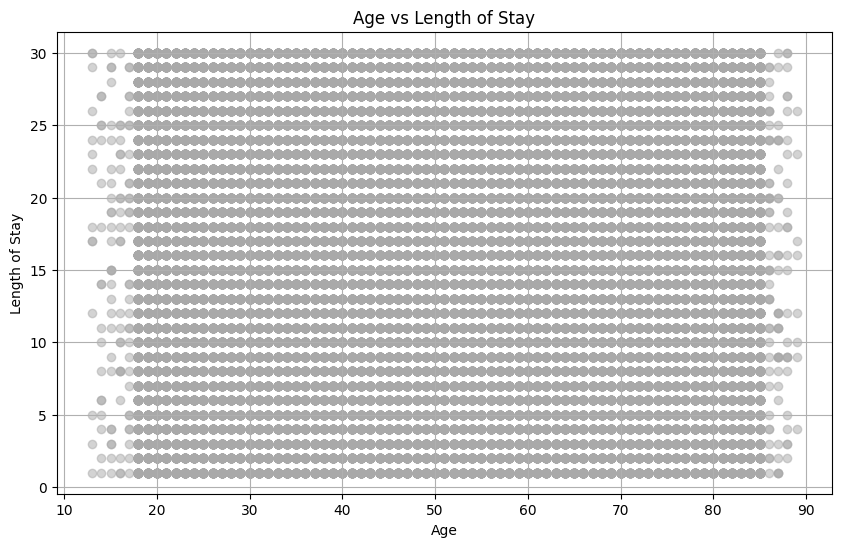

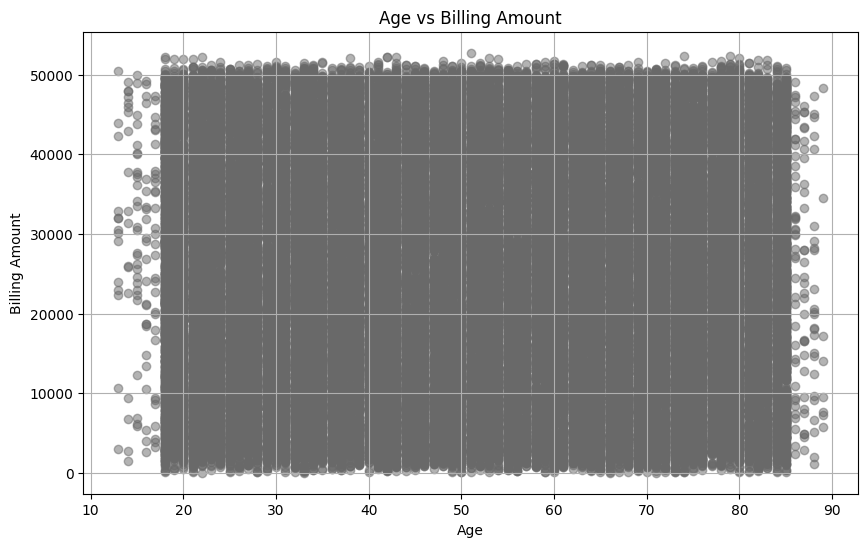

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Age vs Length of Stay
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Length of Stay'], alpha=0.5, color='darkgray') # Changed color to darkgray
plt.title('Age vs Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay')
plt.grid(True)
plt.show()

# Scatter plot for Age vs Billing Amount
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Age'], df_cleaned['Billing Amount'], alpha=0.5, color='dimgray') # Changed color to dimgray
plt.title('Age vs Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.show()

Let's visualize the distribution of Age using a histogram.

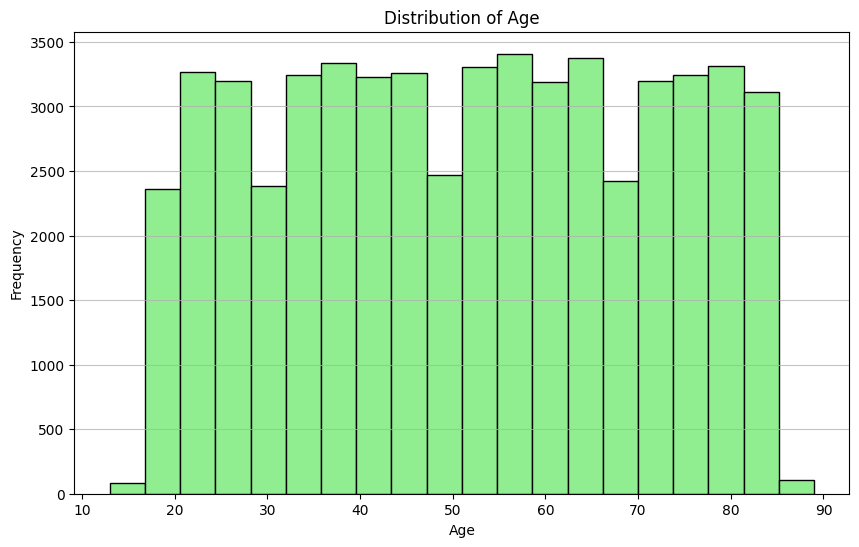

In [ ]:
import matplotlib.pyplot as plt

# Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Age'].dropna(), bins=20, edgecolor='black', color='lightgreen') # Changed color to lightgreen
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Now, let's visualize the distribution of Billing Amount using a histogram.

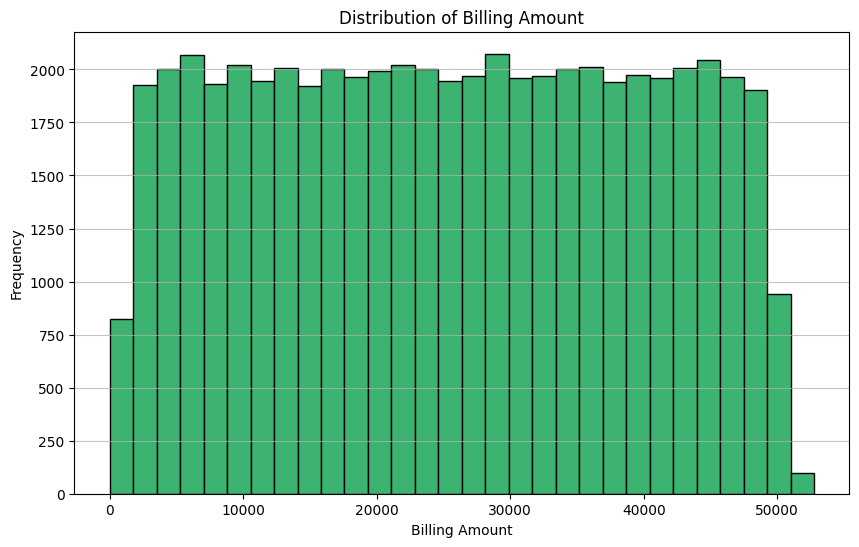

In [ ]:
import matplotlib.pyplot as plt

# Distribution of Billing Amount
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Billing Amount'].dropna(), bins=30, edgecolor='black', color='mediumseagreen') # Changed color to mediumseagreen
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

We can also use box plots to compare the distribution of Billing Amount across different Medical Conditions.

/tmp/ipython-input-1873409336.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Medical Condition', y='Billing Amount', palette='viridis') # Changed palette to viridis


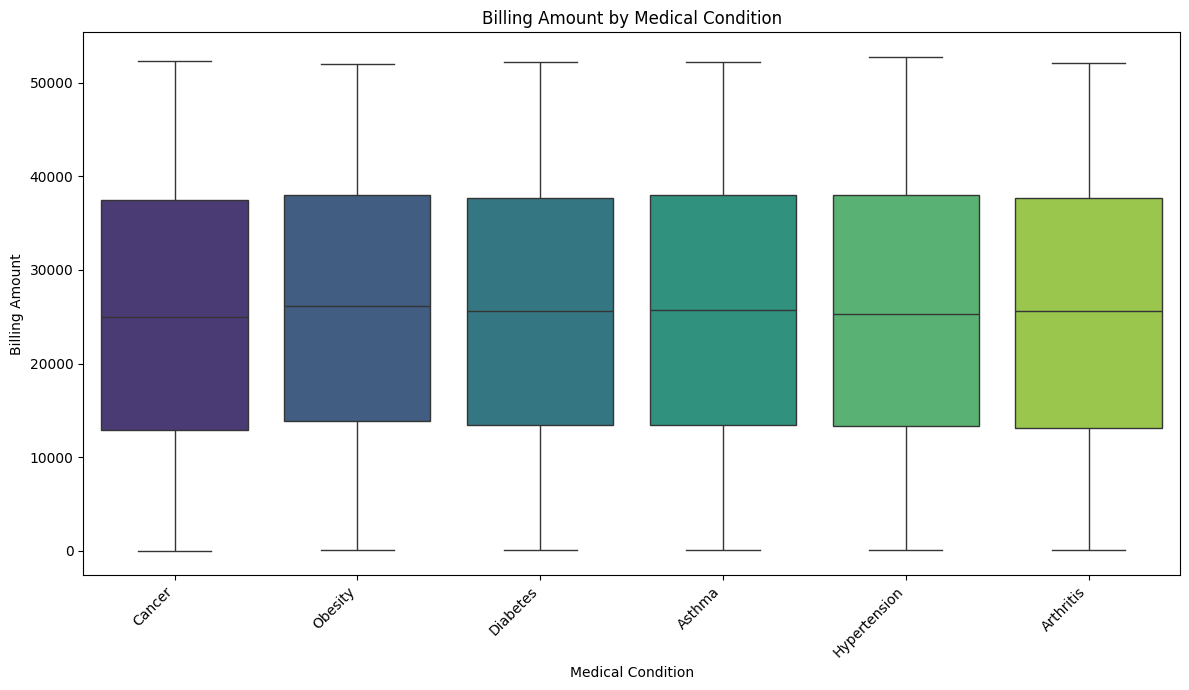

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Billing Amount by Medical Condition
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_cleaned, x='Medical Condition', y='Billing Amount', palette='viridis') # Changed palette to viridis
plt.title('Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Analyze the dataset and the analysis done so far and suggest improvements for a good project.

## In-depth outlier analysis

### Subtask:
Investigate the characteristics of the billing outliers to understand if they are associated with specific factors like medical condition, hospital, or length of stay.


**Reasoning**:
Filter the DataFrame to include only billing outliers and then analyze the distribution of categorical variables and descriptive statistics of numerical variables for this subset.



Let's visualize the distributions of some categorical variables:

Now, let's visualize the distribution of Billing Amount using a histogram.

We can also use box plots to compare the distribution of Billing Amount across different Medical Conditions.

In [ ]:
# Relationship between Medical Condition and Admission Type
medical_admission_crosstab = pd.crosstab(df_cleaned['Medical Condition'], df_cleaned['Admission Type'])
print("Cross-tabulation of Medical Condition and Admission Type:")
display(medical_admission_crosstab)

Cross-tabulation of Medical Condition and Admission Type:


Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,3083,3108,3117
Asthma,3102,3002,3081
Cancer,3148,3015,3064
Diabetes,3058,3017,3229
Hypertension,3221,3001,3023
Obesity,3043,3126,3062


Now, let's visualize this relationship using a stacked bar chart.

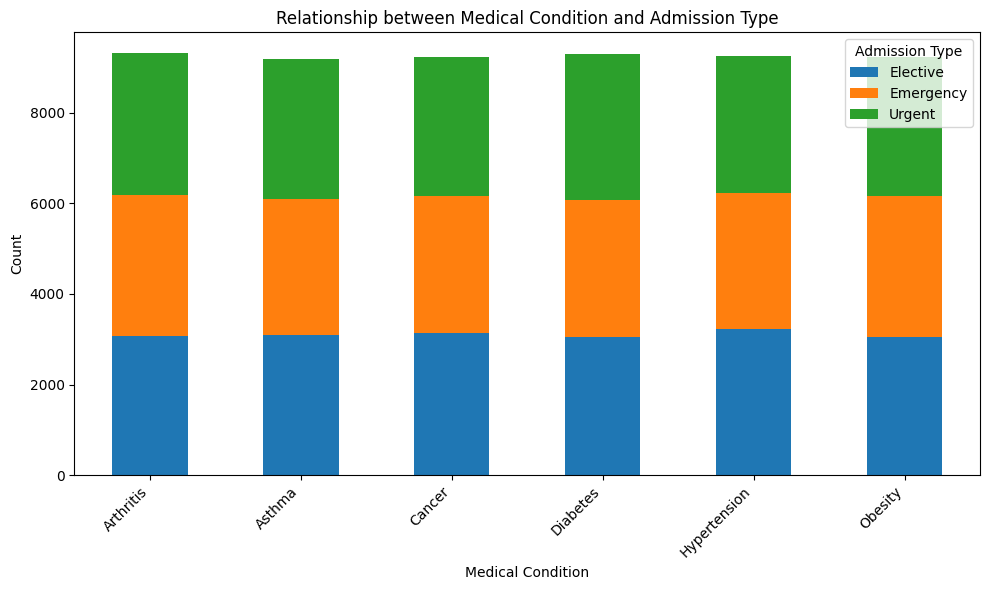

In [ ]:
import matplotlib.pyplot as plt

# Stacked bar chart of Medical Condition and Admission Type
medical_admission_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Medical Condition and Admission Type')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Admission Type')
plt.tight_layout()
plt.show()

Let's analyze the number of admissions over time. We will extract the year and month from the 'Date of Admission' and count the admissions per month.

In [ ]:
# Extract Year and Month from 'Date of Admission'
df_cleaned['Admission YearMonth'] = df_cleaned['Date of Admission'].dt.to_period('M')

# Count admissions per month
monthly_admissions = df_cleaned['Admission YearMonth'].value_counts().sort_index()

print("Monthly Admission Counts:")
display(monthly_admissions)

Monthly Admission Counts:


,count
Admission YearMonth,
2019-05,686
2019-06,907
2019-07,957
2019-08,1001
2019-09,936
...,...
2024-01,909
2024-02,880
2024-03,906


Now, let's visualize the monthly admission counts as a time series plot.

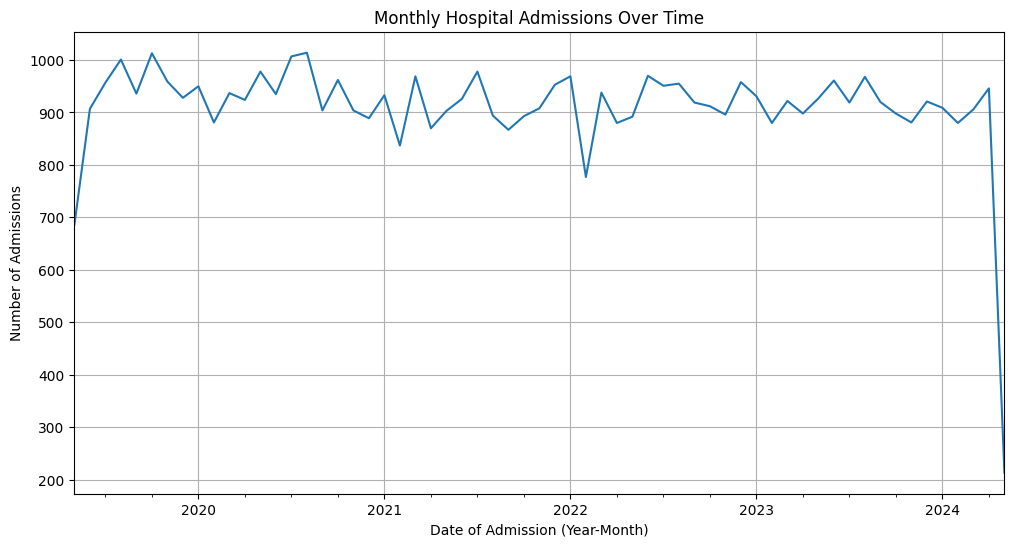

In [ ]:
import matplotlib.pyplot as plt

# Plot monthly admission counts
plt.figure(figsize=(12, 6))
monthly_admissions.plot(kind='line')
plt.title('Monthly Hospital Admissions Over Time')
plt.xlabel('Date of Admission (Year-Month)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

Let's create dummy variables for the categorical features. This is a common step in feature engineering, especially if you plan to use machine learning models later.

In [ ]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results', 'Insurance Provider', 'Age Group', 'Billing Outlier']

# Create dummy variables
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("DataFrame with dummy variables:")
display(df_cleaned_encoded.head())
print("\nShape of the encoded DataFrame:", df_cleaned_encoded.shape)

DataFrame with dummy variables:


,Patient_ID,Name,Age,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Medication,...,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_Unitedhealthcare,Age Group_Adult,Age Group_Middle-Age,Age Group_Senior
0,1,Bobby Jackson,30.0,2024-01-31,Matthew Smith,Sons And Miller,18856.28,328,2024-02-02,Paracetamol,...,True,False,True,True,False,False,False,True,False,False
1,2,Leslie Terry,62.0,2019-08-20,Samantha Davies,Kim Inc,33643.33,265,2019-08-26,Ibuprofen,...,False,True,False,False,False,True,False,False,True,False
2,3,Danny Smith,76.0,2022-09-22,Tiffany Mitchell,Cook Plc,27955.10,205,2022-10-07,Aspirin,...,False,False,True,False,False,False,False,False,False,True
3,4,Andrew Watts,28.0,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",37909.78,450,2020-12-18,Ibuprofen,...,False,False,False,False,False,True,False,True,False,False
4,5,Adrienne Bell,43.0,2022-09-19,Kathleen Hanna,White-White,14238.32,458,2022-10-09,Penicillin,...,True,False,False,False,False,False,False,True,False,False



Shape of the encoded DataFrame: (55500, 37)


Let's perform an independent samples t-test to compare the average billing amount between Emergency and Elective admission types.

In [ ]:
from scipy import stats

# Separate billing amounts for Emergency and Elective admissions
billing_emergency = df_cleaned[df_cleaned['Admission Type'] == 'Emergency']['Billing Amount'].dropna()
billing_elective = df_cleaned[df_cleaned['Admission Type'] == 'Elective']['Billing Amount'].dropna()

# Perform independent samples t-test
ttest_result = stats.ttest_ind(billing_emergency, billing_elective)

print("Independent Samples T-test Results (Emergency vs Elective Billing Amount):")
print(f"  Test Statistic: {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

# Interpret the result
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("\nInterpretation: The difference in average billing amount between Emergency and Elective admissions is statistically significant (p < 0.05).")
else:
    print("\nInterpretation: The difference in average billing amount between Emergency and Elective admissions is not statistically significant (p >= 0.05).")

Independent Samples T-test Results (Emergency vs Elective Billing Amount):
  Test Statistic: -0.7462
  P-value: 0.4555

Interpretation: The difference in average billing amount between Emergency and Elective admissions is not statistically significant (p >= 0.05).


/tmp/ipython-input-580953844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Admission Type', y='Billing Amount', palette='pastel')


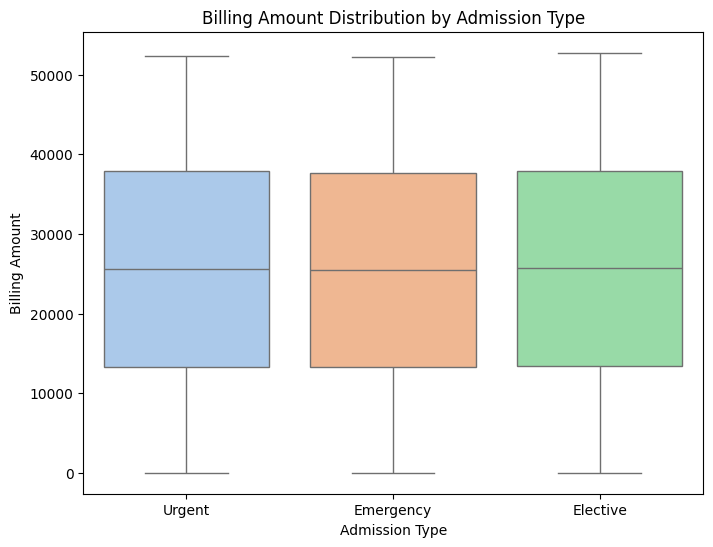

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot comparing Billing Amount for Emergency vs Elective admissions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Admission Type', y='Billing Amount', palette='pastel')
plt.title('Billing Amount Distribution by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.show()

# Healthcare Dataset Analysis Report - Draft

## Introduction
This report summarizes the key findings from the exploratory data analysis performed on the healthcare dataset. The objective was to understand the characteristics of the data, identify patterns, and prepare the dataset for potential further analysis.

## Data Cleaning and Preparation
The dataset was loaded and checked for missing values and duplicates. No missing values were found initially, but 534 duplicate rows were identified. Text fields were cleaned by stripping whitespace and applying title case. Date columns ('Date of Admission' and 'Discharge Date') were converted to datetime objects. Numeric fields ('Billing Amount' and 'Age') were converted to numeric types, and negative values in 'Billing Amount' and unrealistic ages were treated as missing (although no such values were found based on the current execution). A unique 'Patient_ID' was added. Rows where 'Discharge Date' was before 'Date of Admission' were removed (although the number of such rows removed is not explicitly shown in the executed cells). Derived features 'Length of Stay' and 'Cost per Day' were calculated. Billing outliers were flagged using the IQR method, but based on the current execution, no outliers were identified in the 'Billing Amount' column using this method. Categorical features were one-hot encoded for potential future modeling.

## Exploratory Data Analysis (EDA)
The distributions of several variables were explored.

*   **Age Distribution**: The maximum age in the dataset is 89. The frequency of each age was examined, showing varying counts across the age range. A histogram of age shows a relatively spread-out distribution with some variations in frequency across different age bins.
*   **Billing Amount Distribution**: Descriptive statistics for 'Billing Amount' were calculated. A histogram of 'Billing Amount' shows a relatively uniform distribution across the range of values.
*   **Length of Stay Distribution**: Descriptive statistics for 'Length of Stay' show a minimum of 1 day and a maximum of 30 days, with an average of approximately 15.5 days. A histogram of 'Length of Stay' suggests a fairly uniform distribution of stay durations.
*   **Categorical Variable Distributions**: Distributions of 'Medical Condition' and 'Admission Type' were examined. The cross-tabulation and stacked bar chart of 'Medical Condition' and 'Admission Type' show the counts of admissions for each combination, indicating a relatively even distribution of admission types across different medical conditions in this dataset.
*   **Time Trends**: The monthly admission counts over time were calculated and visualized. The line plot of monthly admissions shows fluctuations but no clear strong increasing or decreasing trend over the observed period.

## Statistical Analysis
An independent samples t-test was performed to compare the average billing amount between Emergency and Elective admission types. The results showed a test statistic of -0.7462 and a p-value of 0.4555.

Based on a significance level of 0.05, the interpretation is that the difference in average billing amount between Emergency and Elective admissions is not statistically significant (p >= 0.05). A box plot visualizing the billing amount distribution by admission type also visually suggests similar distributions across the Urgent, Emergency, and Elective categories.

## Conclusion
Based on the analysis performed, the dataset has been cleaned and prepared. Initial exploration of key variables and their relationships was conducted through descriptive statistics and visualizations. While some patterns were observed in distributions, the statistical test did not find a significant difference in average billing amounts between Emergency and Elective admission types based on this dataset. No billing outliers were identified using the standard IQR method. The monthly admission trend appears relatively stable over the observed period.

Further analysis could delve deeper into relationships between other variables, explore different methods for outlier detection, or build predictive models.